In [2]:
# importaciones necesarias para el EDA:
import pandas as pd
import numpy as np
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_flight_activity = pd.read_csv('files/customer_flight_activity.csv')

In [4]:
df_loyalty_histori = pd.read_csv('files/customer_loyalty_history.csv', index_col=0)

In [5]:
df_flight_activity.sample(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
269215,937071,2018,4,0,0,0,0,0.0,0,0
146301,689993,2017,9,0,0,0,0,0.0,0,0
4786,355724,2017,1,0,0,0,0,0.0,0,0
67526,995877,2017,4,0,0,0,0,0.0,0,0
395557,465170,2018,12,0,0,0,0,0.0,0,0
339799,196202,2018,9,8,1,9,2970,297.0,0,0
192345,443865,2017,12,15,6,21,4242,424.0,0,0
26320,602346,2017,2,0,0,0,0,0.0,0,0
25469,557458,2017,2,0,0,0,0,0.0,0,0
258464,757834,2017,3,13,3,16,2016,201.0,396,32


In [6]:
df_flight_activity.shape

(405624, 10)

In [7]:
df_flight_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [8]:
df_flight_activity.info() # no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [9]:
df_flight_activity.duplicated().sum()

1864

In [10]:
df_flight_activity['Loyalty Number'].value_counts() # mi teoria es que son las veces que han volado, y si en el vuelo canjearon puntos

Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64

In [11]:
df_flight_activity[df_flight_activity.duplicated()].sample(5) # observo un poco los datos
# para ver TODOS los dupplicados: df_flight_activity[df_flight_activity.duplicated(keep=False)]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
260767,486860,2018,4,0,0,0,0,0.0,0,0
272281,200519,2018,5,0,0,0,0,0.0,0,0
277924,499874,2018,5,0,0,0,0,0.0,0,0
165856,831341,2017,10,0,0,0,0,0.0,0,0
178521,490439,2018,12,0,0,0,0,0.0,0,0


In [12]:
df_flight_activity = df_flight_activity.drop_duplicates() 
# al ser filas que carecen de valor al repetirse y no tener datos como distancia o puntos acululados 
# me lleva a pensar que realmente si es un error y no como pensaba al principio que podrian ser vuelos recurrentes para los clientes
# asi que decido eliminarlas del dataframe

In [13]:
df_flight_activity.shape

(403760, 10)

In [14]:
# no hay nulos en el dataframe, la unica fila que es float es puntos acumulados, compruebo si se pueden acumular puntos decimales
df_loyalty_histori.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [15]:
df_loyalty_histori.shape

(16737, 15)

In [16]:
df_loyalty_histori.describe(include = "O").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [17]:
df_loyalty_histori.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [18]:
df_loyalty_histori.info()
# en salary hay nulos y negativos, en cancelation year y cancelation month hay nulos

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 2.0

In [19]:
def quitar_negativos(col):
    col = col.astype(str).str.replace('-', '').astype(float)
    return col

In [20]:
df_loyalty_histori['Salary'] = df_loyalty_histori['Salary'].astype(str)
df_loyalty_histori['Salary'] = df_loyalty_histori['Salary'].str.replace('-','') # quito el -
df_loyalty_histori['Salary'] = df_loyalty_histori['Salary'].astype(float)

In [21]:
# como pais es el mismo, hare una media de que gana cada educacion y asi rellenare los nan
df_loyalty_histori['Country'].unique()
df_loyalty_histori['Education'].unique() 

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [22]:
round(df_loyalty_histori.groupby("Education")["Salary"].mean(), 2)
# no hay ningun registro de college

Education
Bachelor                 72577.25
College                       NaN
Doctor                  178608.90
High School or Below     61199.16
Master                  103757.85
Name: Salary, dtype: float64

In [23]:
media_college = (72451.06+61071.72)/2 
media_college # como college esta entre bachelor y high school hago media de ambos y relleno

66761.39

In [24]:
df_loyalty_histori[df_loyalty_histori["Education"] == "College"] # 4238
df_loyalty_histori[df_loyalty_histori['Salary'].isna()] # 4238  para confirmar que todos los nan son de college

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN
988178,Canada,Quebec,Montreal,H4G 3T4,Male,College,NaN,Single,Star,3871.07,Standard,2013,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632951,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Star,44771.30,Standard,2018,7,NaN,NaN
546773,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Star,52811.49,Standard,2015,9,NaN,NaN
900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN


In [25]:
df_loyalty_histori['Salary'] = df_loyalty_histori['Salary'].fillna(media_college) # la anterior celda lo confirma

In [26]:
# los otros nulos pertenecen a las columnas de fin de membresia, si aplica
# supongo que esas personas no han cancelado y sigue activa su membresia por lo que cambiare los nan por 0
df_loyalty_histori['Cancellation Year'] = df_loyalty_histori['Cancellation Year'].fillna(0)
df_loyalty_histori['Cancellation Month'] = df_loyalty_histori['Cancellation Month'].fillna(0)

In [27]:
df_loyalty_histori.sample(3)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
369084,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,College,66761.39,Married,Star,11039.32,2018 Promotion,2018,4,0.0,0.0
499945,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,66761.39,Married,Aurora,9048.98,Standard,2014,6,0.0,0.0
516519,Canada,Newfoundland,St. John's,A1C 6H9,Female,College,66761.39,Divorced,Nova,5264.64,2018 Promotion,2018,2,0.0,0.0


In [28]:
df_loyalty_histori.columns

Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [29]:
# compruebo duplicados:
df_loyalty_histori.duplicated().sum()


0

In [30]:
df_completo = df_flight_activity.merge(df_loyalty_histori, on="Loyalty Number", how="left")

In [31]:
df_completo.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
347965,193824,2017,6,20,8,28,2548,254.0,726,59,Canada,Quebec,Montreal,H2T 9K8,Female,High School or Below,39426.00,Married,Star,2620.60,Standard,2015,3,0.0,0.0
199267,864128,2017,12,8,0,8,1504,150.0,0,0,Canada,Quebec,Montreal,H2T 2J6,Female,College,66761.39,Single,Aurora,24258.71,Standard,2016,1,0.0,0.0
229846,707754,2018,3,3,0,3,633,94.5,0,0,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Doctor,212281.00,Divorced,Aurora,9421.10,Standard,2016,10,0.0,0.0
339545,270723,2018,9,5,0,5,815,81.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,72435.00,Single,Star,4732.22,Standard,2014,9,0.0,0.0
154491,271660,2017,10,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,66761.39,Married,Star,4270.03,Standard,2015,4,0.0,0.0


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [32]:
# tenemos los datos de dos años unicamente, entonces voy a dividir el dataframe entre los dos años y despues ver la cantidad de vuelos comprados por mes
df_flight_activity['Year'].unique()

array([2017, 2018], dtype=int64)

In [33]:
vuelos_2017 = df_flight_activity[df_flight_activity['Year'] == 2017]
vuelos_2018 = df_flight_activity[df_flight_activity['Year'] == 2018]

In [34]:
# hago subplots, con un barplot y un boxplot por cada año
# el barplot para ver la cantidad de vuelos por mes en el año correspondiente
# el boxplot para ver la dispersion entre reservas

C:\Users\miria\AppData\Local\Temp\ipykernel_32968\3067034737.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Month",
C:\Users\miria\AppData\Local\Temp\ipykernel_32968\3067034737.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Month",


Text(0, 0.5, 'Total de vuelos')

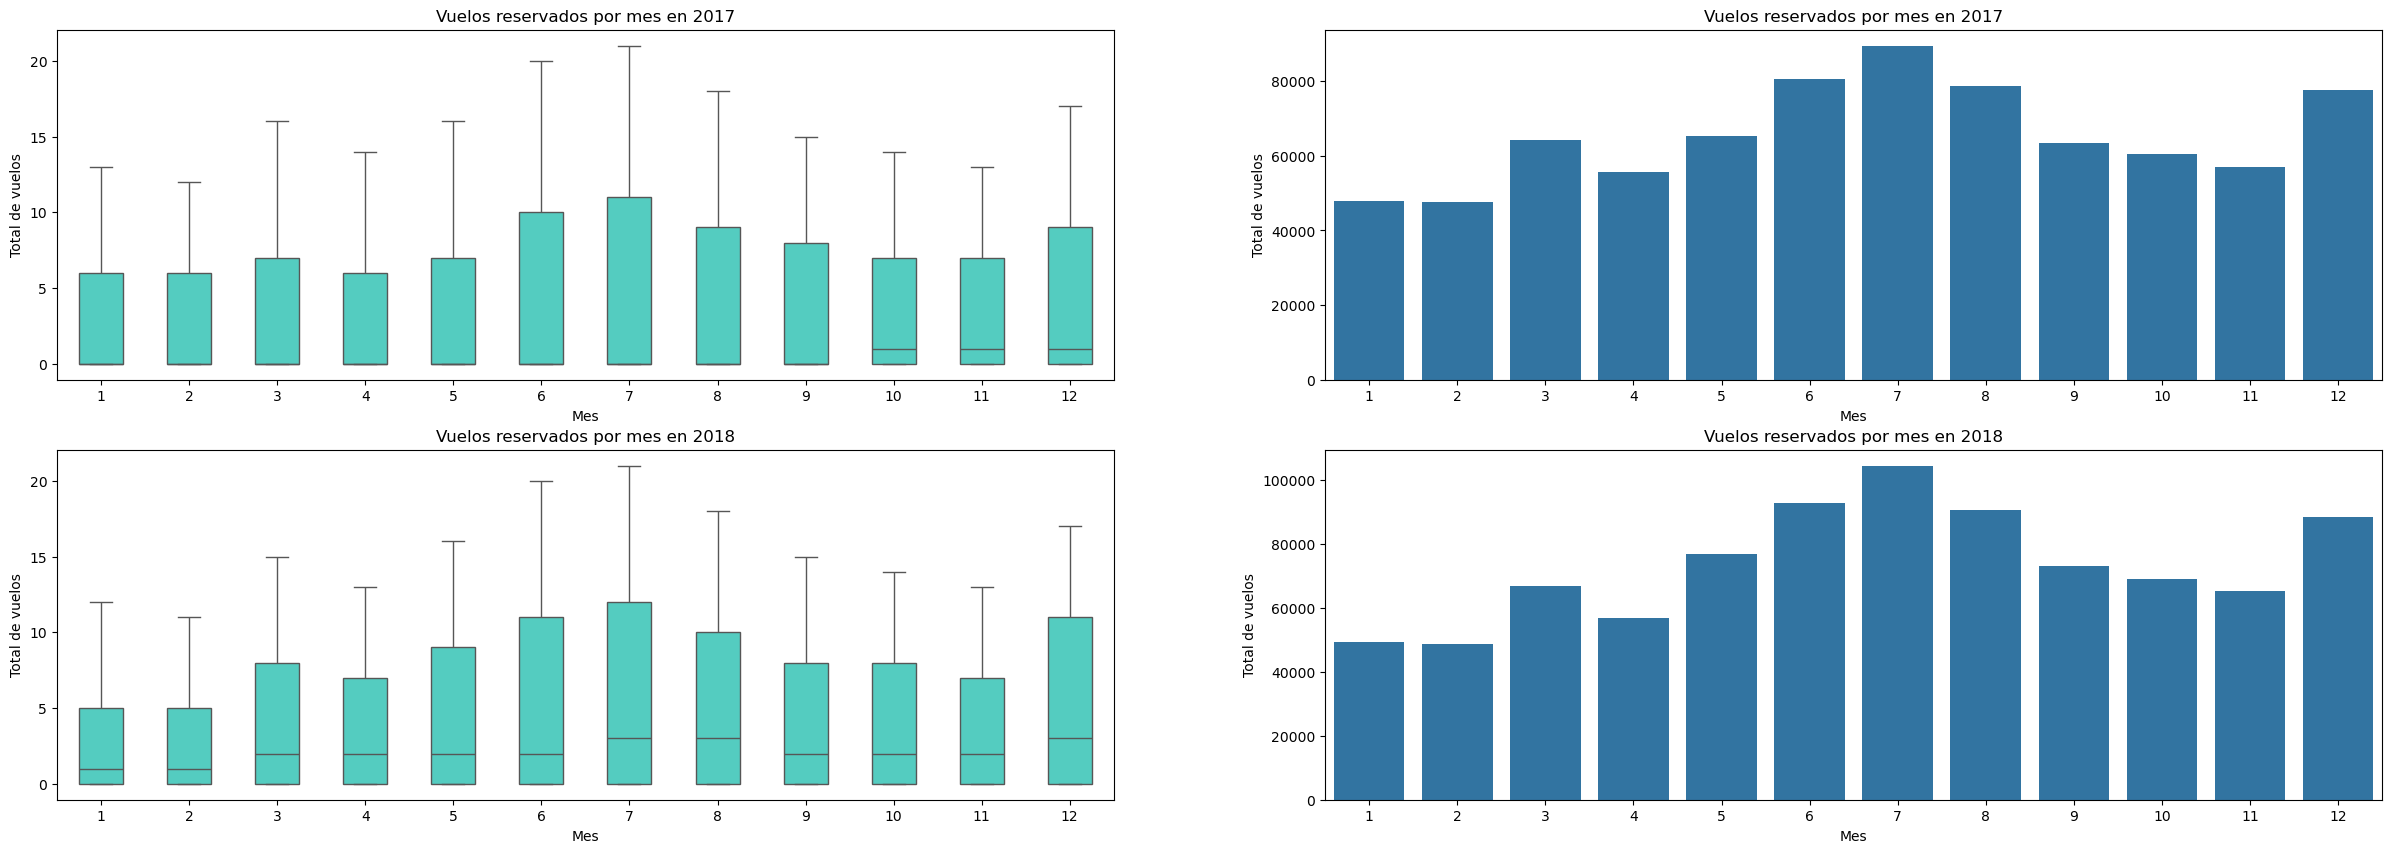

In [35]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

sns.boxplot(y = "Flights Booked", 
            x = "Month",
            data = vuelos_2017, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[0][0])
axes[0][0].set_title("Vuelos reservados por mes en 2017")
axes[0][0].set_xlabel("Mes")
axes[0][0].set_ylabel("Total de vuelos")
sns.barplot(x="Month", 
            y="Flights Booked",
            data=vuelos_2017,
            estimator="sum", 
            ci=None,
            ax = axes[0][1]) # para quitar la linea
axes[0][1].set_title("Vuelos reservados por mes en 2017")
axes[0][1].set_xlabel("Mes")
axes[0][1].set_ylabel("Total de vuelos")

sns.boxplot(y = "Flights Booked", 
            x = "Month",
            data = vuelos_2018, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[1][0])
axes[1][0].set_title("Vuelos reservados por mes en 2018")
axes[1][0].set_xlabel("Mes")
axes[1][0].set_ylabel("Total de vuelos")
sns.barplot(x="Month", 
            y="Flights Booked",
            data=vuelos_2018,
            estimator="sum", 
            ci=None,
            ax = axes[1][1])
axes[1][1].set_title("Vuelos reservados por mes en 2018")
axes[1][1].set_xlabel("Mes")
axes[1][1].set_ylabel("Total de vuelos")


Conclusión: podemos ver como en 2017 y 2018 se distribuyen de forma parecida las reservas, el boxplot indica en ambos años que el mayor numero de reservas que se hizo por cliente se concentra entre los meses de junio, julio y agosto y en diciembre. El barplot indica el numero total de reservas por mes, en ambos años los meses de mayor cantidad de compra de vuelos se realizan en junio, julio, agosto y diciembre, mientras que en los meses de enero y febrero son los meses de menor venta de vuelos de la compañia

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [36]:
# los puntos acumulados estan directamente relacionados con la distancia de los vuelos como he podido observar en la limpieza del dataframe
df_completo[['Distance','Points Accumulated']].sample(10)

,Distance,Points Accumulated
329876,1631,163.0
327137,1440,144.0
25182,0,0.0
132455,0,0.0
256704,0,0.0
26546,0,0.0
365695,0,0.0
221200,2556,255.0
99170,0,0.0
256593,0,0.0


Text(0.5, 1.0, 'Relación entre la distancia recorrida y los puntos acumulados')

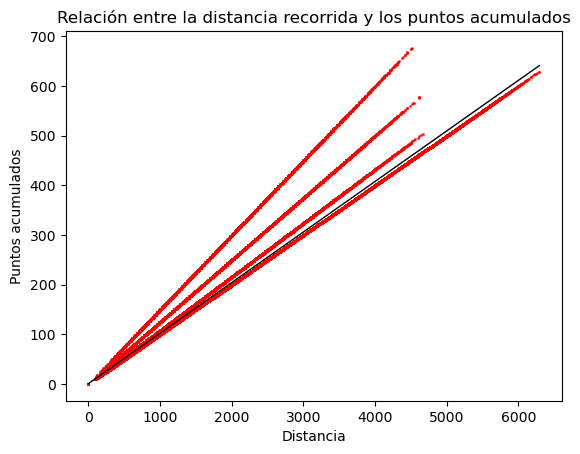

In [37]:
sns.regplot(x = "Distance", 
            y = "Points Accumulated", 
            data = df_completo, 
            marker = "o", 
            line_kws = {"color": "black", "linewidth": 1},
            scatter_kws = {"color": "red", "s": 1} 
            )
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre la distancia recorrida y los puntos acumulados")

In [38]:
df_correlaciones = df_completo[['Distance','Points Accumulated']].corr( method = "pearson")
df_correlaciones # relacion lineal y fuerte (cerca de 1) 

,Distance,Points Accumulated
Distance,1.000000,0.994546
Points Accumulated,0.994546,1.000000


Conclusión: como muestra la gráfica a mayor distancia en los vuelos más puntos acumulados

3. ¿Cuál es la distribución de los clientes por provincia o estado?

C:\Users\miria\AppData\Local\Temp\ipykernel_32968\1569056314.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Province",


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Alberta'),
  Text(1, 0, 'Ontario'),
  Text(2, 0, 'British Columbia'),
  Text(3, 0, 'Saskatchewan'),
  Text(4, 0, 'Quebec'),
  Text(5, 0, 'Newfoundland'),
  Text(6, 0, 'Manitoba'),
  Text(7, 0, 'New Brunswick'),
  Text(8, 0, 'Nova Scotia'),
  Text(9, 0, 'Prince Edward Island'),
  Text(10, 0, 'Yukon')])

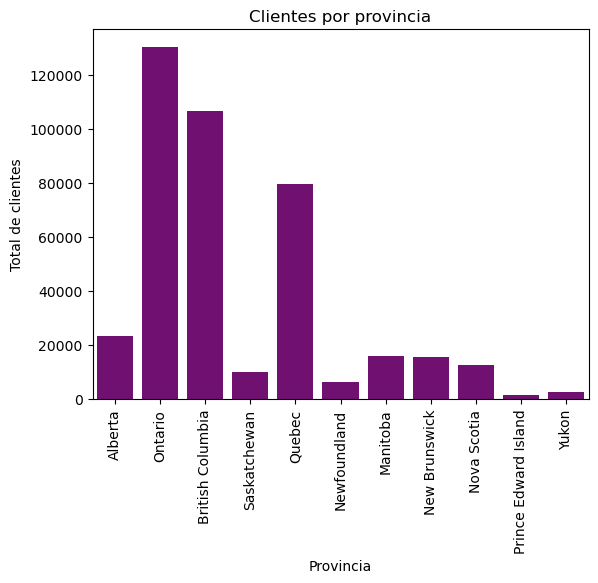

In [39]:
sns.barplot(x="Province", 
            y="Loyalty Number",
            data=df_completo,
            color='purple',
            estimator="count", 
            ci=None,
            )
plt.title("Clientes por provincia")
plt.xlabel("Provincia")
plt.ylabel("Total de clientes")
plt.xticks(rotation=90)

Conclusión: en las provincias de Ontario, British Columbia y Quebec se concentra el mayor numero de clientes y en Newfoundland, Prince Edward Island y Yukon son las tres provincias donde menos clientes hay

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

C:\Users\miria\AppData\Local\Temp\ipykernel_32968\1138253385.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Education",


Text(0, 0.5, 'Salario medio')

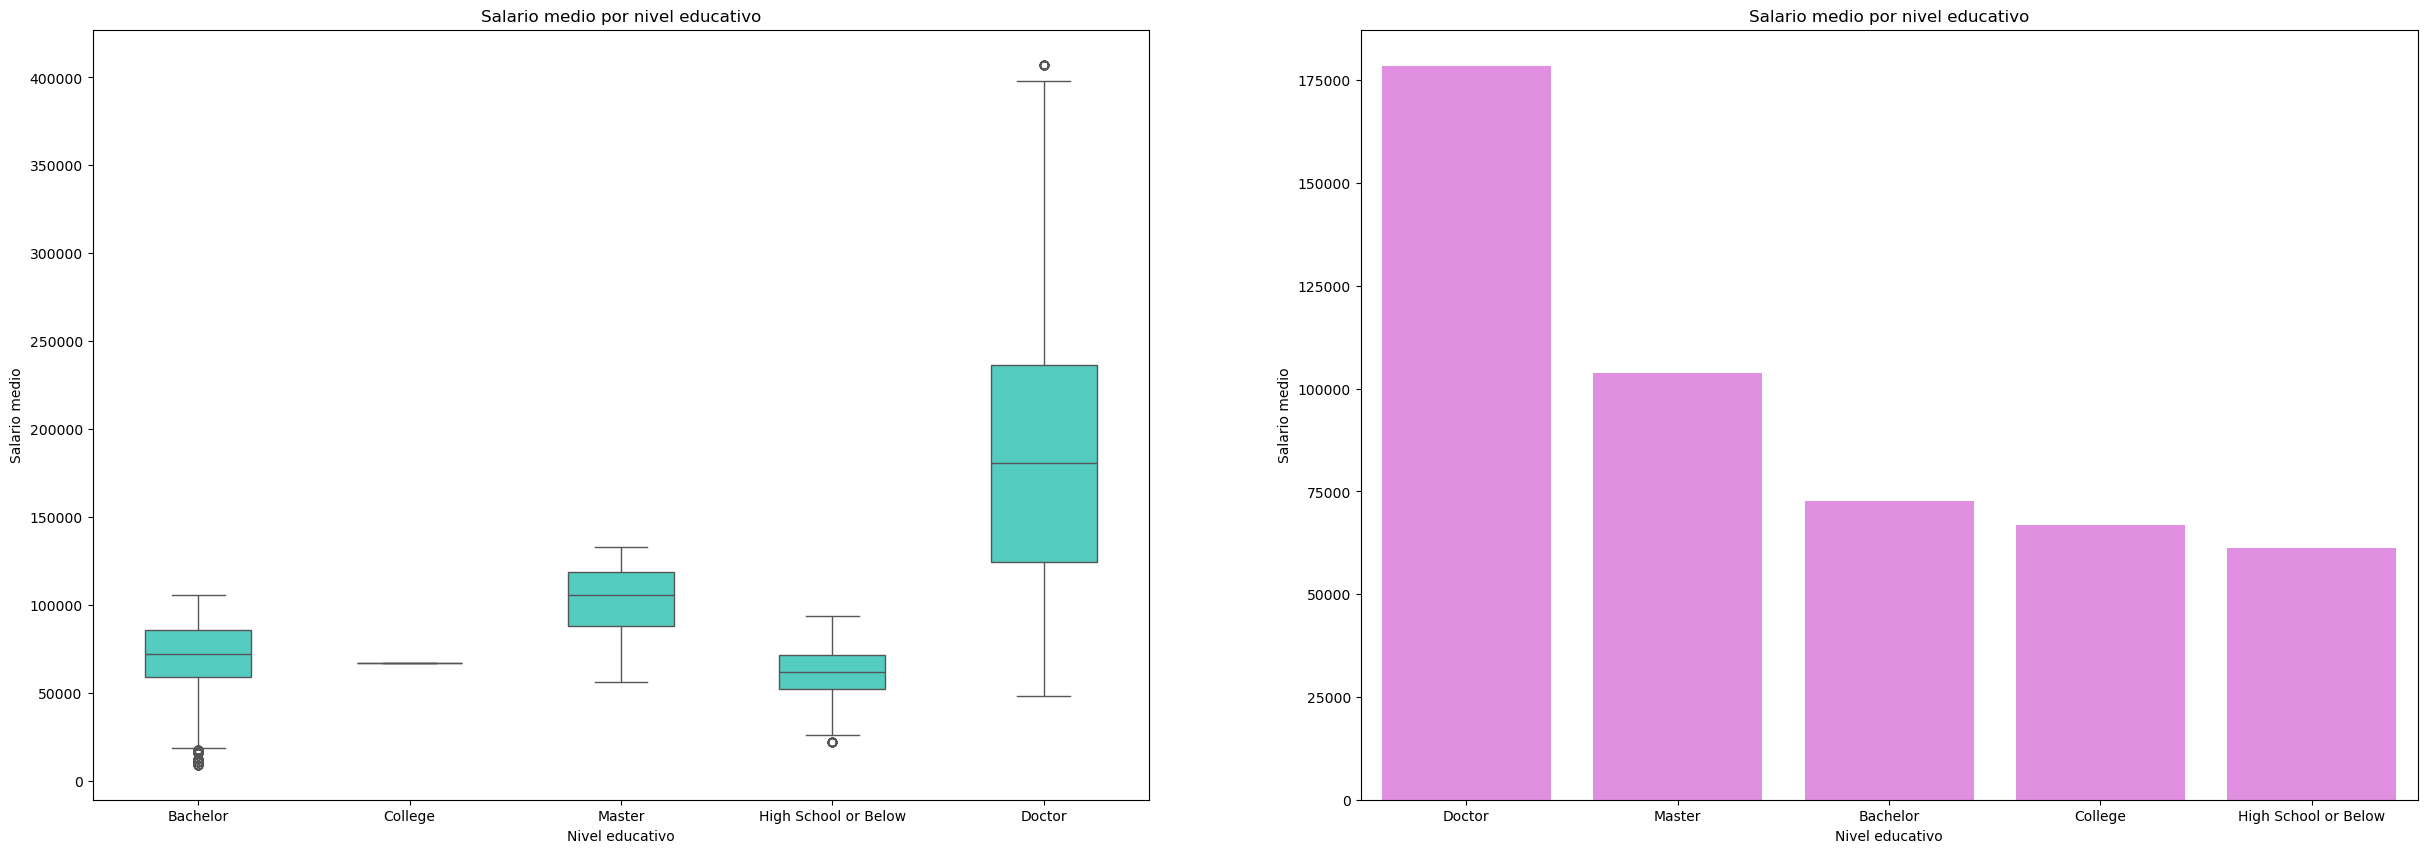

In [40]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))

sns.boxplot(y = "Salary", 
            x = "Education",
            data = df_completo, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[0])
axes[0].set_title("Salario medio por nivel educativo")
axes[0].set_xlabel("Nivel educativo")
axes[0].set_ylabel("Salario medio")

sns.barplot(x="Education", 
            y="Salary",
            data=df_completo,
            color='violet',
            estimator="mean", 
            ci=None,
            order=['Doctor','Master', 'Bachelor', 'College', 'High School or Below'],
            ax = axes[1])
axes[1].set_title("Salario medio por nivel educativo")
axes[1].set_xlabel("Nivel educativo")
axes[1].set_ylabel("Salario medio")


In [41]:
varianza_sueldos = df_completo['Salary'].var()
varianza_sueldos # los sueldos están muy dispersos

930575367.2885406

Conclusión: podemos observar en la grafica de barras que cuanto mas estudios tiene un cliente mayor es su sueldo, tambien podemos observar como en el boxplot en los niveles Bachelor y High School or Below vemos clientes que se alejan del promedio y cobran sueldos considerablemente inferiores, en cambio en Doctor vemos como algun cliente esta muy por encima del promedio.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Text(0.5, 1.0, 'Proporcion de clientes por tarjeta de fidelidad')

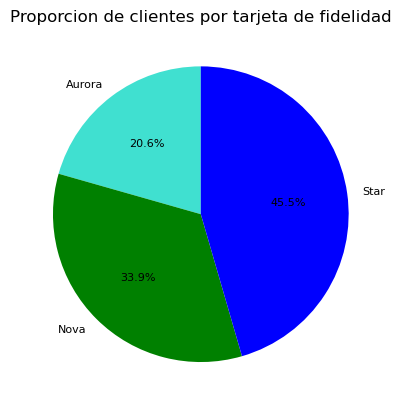

In [42]:
df_clientes_fidelidad = df_completo.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()
colores= ['turquoise','green','blue']
plt.pie("Loyalty Number", labels= "Loyalty Card",
        data = df_clientes_fidelidad, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);
plt.title("Proporcion de clientes por tarjeta de fidelidad")

Conclusión: casi el 50% de los clientes pertenecen a la clase Star, el 34% a la clase Nova y el 20% a la clase Aurora

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

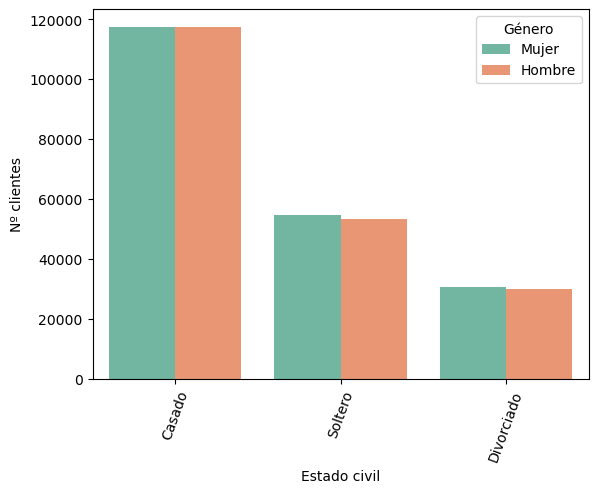

In [43]:
df_copia = df_completo.copy()
df_copia["Gender"] = df_copia["Gender"].replace({"Male": "Hombre","Female": "Mujer"}) # para traducir
df_copia['Marital Status'] = df_copia['Marital Status'].replace({'Married': 'Casado', 'Single':'Soltero', 'Divorced':'Divorciado'}) # para traducir

sns.countplot(x = "Marital Status", 
              data = df_copia, 
              palette = "Set2" , 
              order = ['Casado','Soltero', 'Divorciado'], 
              hue = "Gender")  
plt.xticks(rotation = 70)
plt.xlabel("Estado civil")
plt.ylabel("Nº clientes")
plt.legend(title="Género");

Conclusión: practicamente no hay diferencia entre los géneros, hay el mismo número de mujeres y hombres tanto casados, solteros y divorciados por lo que esta muy equilibrado, sin embargo hay muchos mas clientes que estan casados, practicamente el doble que solteros y el triple que divorciados

Una vez contestadas estas preguntas, lo que le comunicaría a la empresa sería que basandome en los datos recogidos entre 2017 y 2018 sobre los clientes y sus reservas de vuelos, me centraría en aumentar la capacidad para poder recibir todas las ventas en los meses de verano(junio, julio y agosto) y en diciembre, hacer incapie quiza con publicidad en que esta compañia ofrece acumular mas puntos si los viajes son mas largos.
Dependiendo de la estrategia a seguir, enfocarse en la venta en los estados donde mas clientes se acumulan o por el contrario aumentar la visibilidad y la publicidad de la compañia en los estados donde hay menos clientes, ademas de hacer promociones para recien casados, para aniversarios, etc, para incentivar a la mayoria de clientes a viajar. 


## BONUS

Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.

In [44]:
df_filtrado_education_booked = df_completo[['Flights Booked', 'Education']]

Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada
grupo

In [45]:
df_filtrado_education_booked.groupby('Education')['Flights Booked']. describe().T # promedio es mean y std es la desviación estandar

Education,Bachelor,College,Doctor,High School or Below,Master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles educativos.

Text(0.5, 1.0, 'Relacion nivel educativo-vuelos reservados')

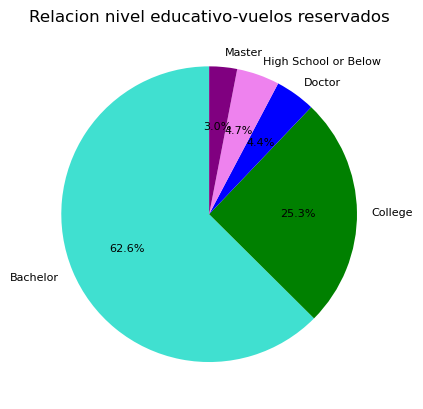

In [46]:
# veamos un grafico con los vuelos reservados por nivel educativo
df_pie = df_filtrado_education_booked.groupby('Education')['Flights Booked'].count().reset_index()
colores= ['turquoise','green','blue','violet','purple']
plt.pie("Flights Booked", labels= "Education",
        data = df_pie, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);
plt.title("Relacion nivel educativo-vuelos reservados")

sorprendentemente hay una alta diferencia entre las reservas por nivel educativo, los clientes que han estudiado hasta Bachelor representan el 62.6% de las reservas de los vuelos.
